<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_230241767_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.005)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 230241767
period = 30.5579852001653  # Orbital period in days
epoch = 2015.96188229425
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.8]
folded_lc = folded_lc[folded_lc.time > -0.8]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_230241767_all_sector_lightcurve.csv


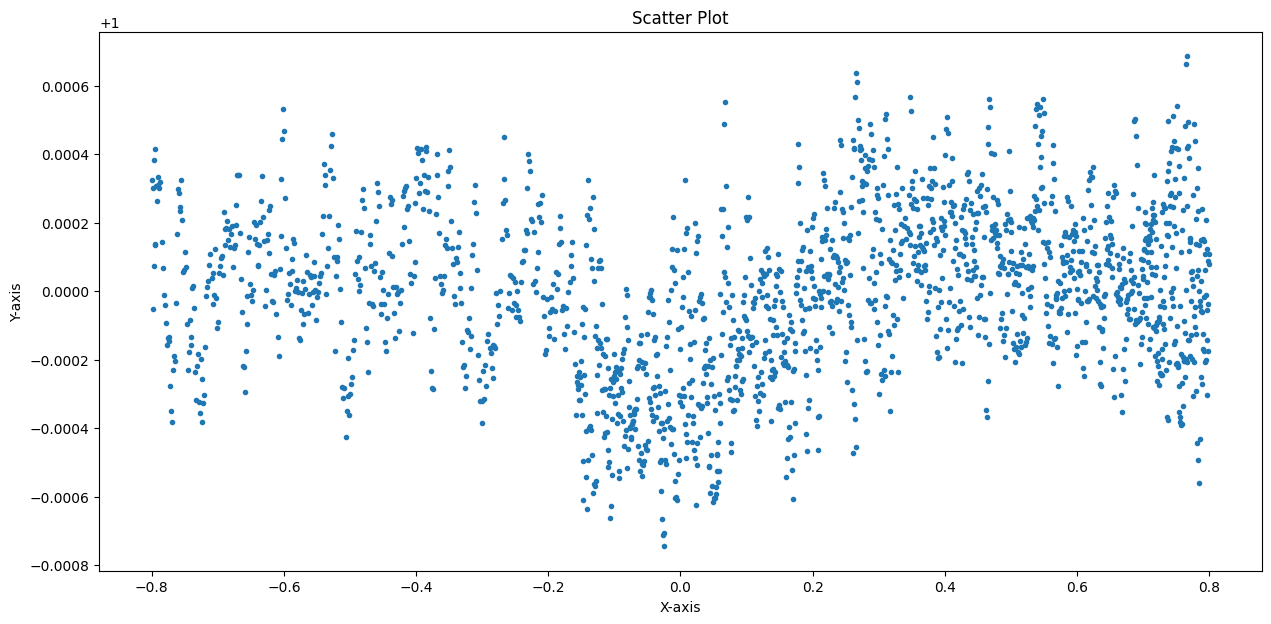

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [7]:
ID = tic_id
sectors = np.array([26, 52, 53])
target = tr.target(ID=ID, sectors=sectors, search_radius=7) # target radius shorted

<ipython-input-10-8b33a612d637>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_26, ap_52, ap_53])


Sector 26


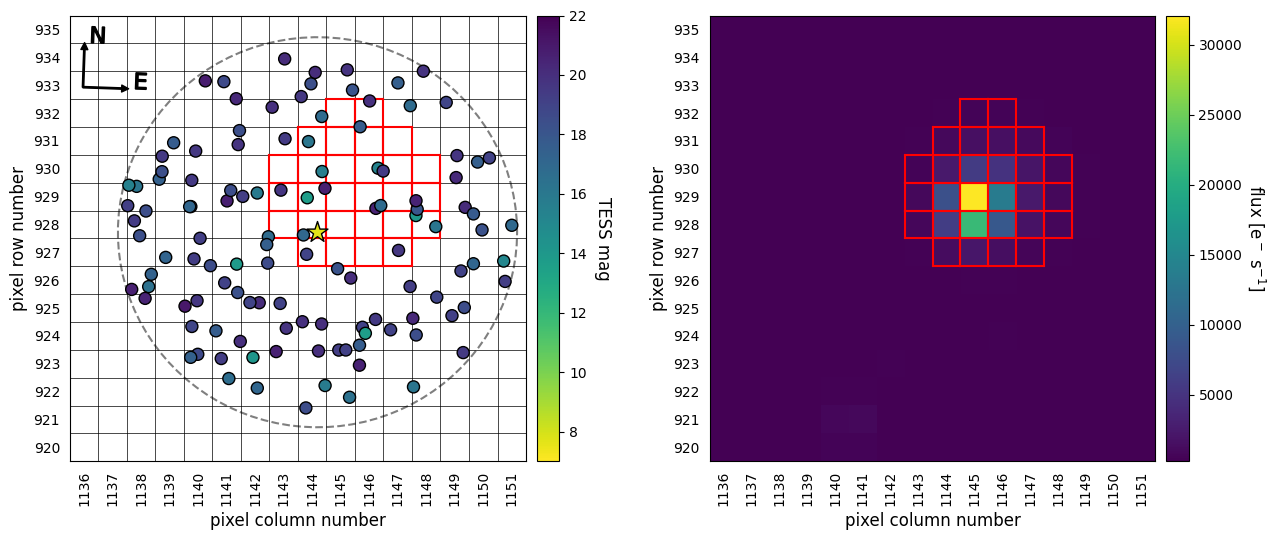

Sector 52


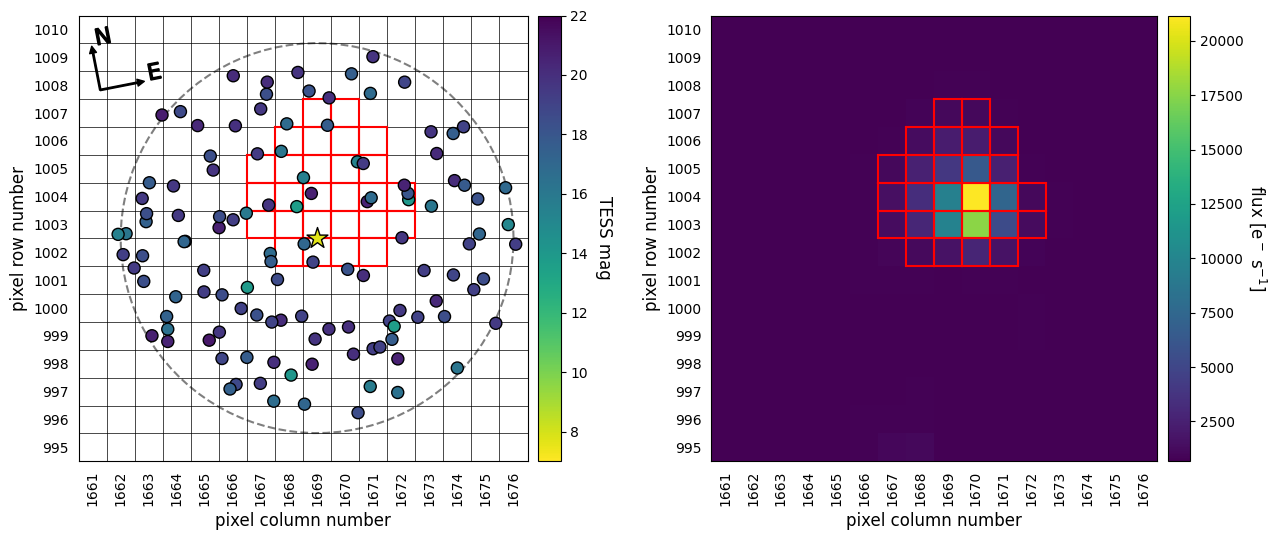

Sector 53


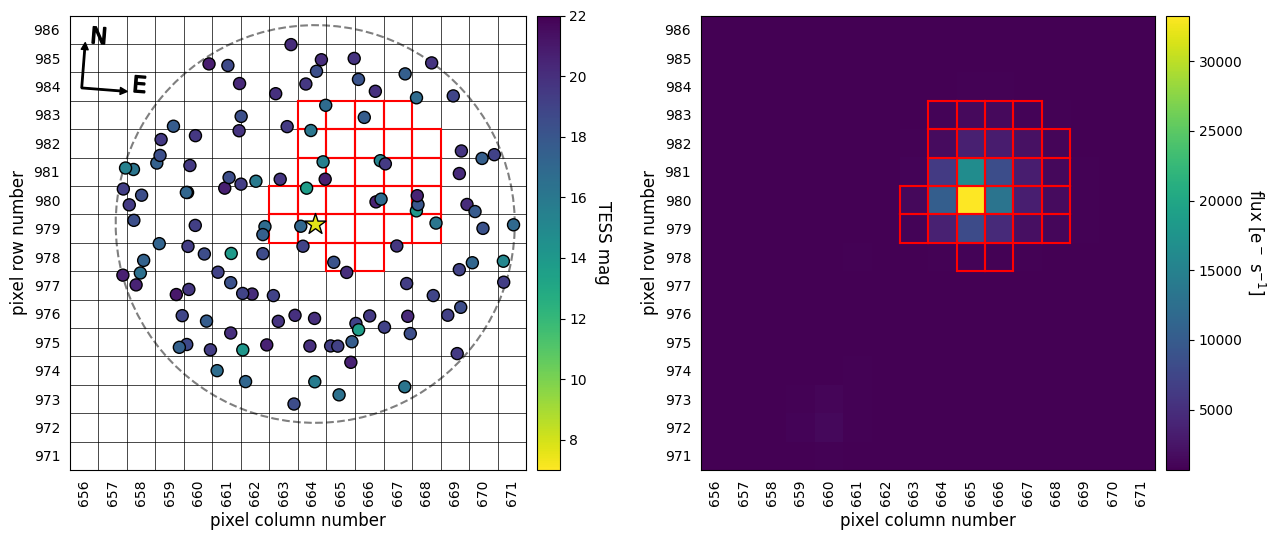

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,230241767,7.69224,6.360,5.790,5.572,264.472278,18.591711,0.438123,0.442157,3675.00,122.561000,0.000,0.000
1,1506618812,17.02760,NaN,NaN,NaN,264.469343,18.591056,0.660000,1.015880,4229.00,0.535385,10.289,256.746
2,1506618805,18.99700,NaN,NaN,NaN,264.470262,18.587132,NaN,NaN,4602.00,0.450252,17.862,202.652
3,230241775,13.69400,13.047,12.719,12.627,264.469668,18.598678,1.060000,1.116900,5874.87,1.134740,26.614,340.450
4,1506618806,18.13530,NaN,NaN,NaN,264.477002,18.584402,NaN,NaN,4056.00,1.004520,30.857,148.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1506618968,19.74920,NaN,NaN,NaN,264.492608,18.625333,NaN,NaN,NaN,-0.584037,139.502,29.812
117,1506619928,20.69790,NaN,NaN,NaN,264.433712,18.578729,NaN,NaN,NaN,NaN,139.651,250.454
118,230241769,16.92490,15.744,15.356,14.854,264.513292,18.594486,NaN,NaN,4017.00,1.879600,140.302,85.911
119,1506618926,19.28710,NaN,NaN,NaN,264.512590,18.582978,NaN,NaN,NaN,3.526640,141.099,102.868


In [10]:
ap_26 = np.array([[1143.0, 928.0], [1143.0, 929.0], [1143.0, 930.0], [1144.0, 927.0],
      [1144.0, 928.0], [1144.0, 929.0], [1144.0, 930.0], [1144.0, 931.0], [1145.0,
        927.0], [1145.0, 928.0], [1145.0, 929.0], [1145.0, 930.0], [1145.0, 931.0],
      [1145.0, 932.0], [1146.0, 927.0], [1146.0, 928.0], [1146.0, 929.0], [1146.0,
        930.0], [1146.0, 931.0], [1146.0, 932.0], [1147.0, 927.0], [1147.0, 928.0],
      [1147.0, 929.0], [1147.0, 930.0], [1147.0, 931.0], [1148.0, 928.0], [1148.0,
        929.0], [1148.0, 930.0]])
ap_52 = np.array([[1667.0, 1003.0], [1667.0, 1004.0], [1667.0,
        1005.0], [1668.0, 1002.0], [1668.0, 1003.0], [1668.0, 1004.0], [1668.0, 1005.0],
      [1668.0, 1006.0], [1669.0, 1002.0], [1669.0, 1003.0], [1669.0, 1004.0], [1669.0,
        1005.0], [1669.0, 1006.0], [1669.0, 1007.0], [1670.0, 1002.0], [1670.0, 1003.0],
      [1670.0, 1004.0], [1670.0, 1005.0], [1670.0, 1006.0], [1670.0, 1007.0], [1671.0,
        1002.0], [1671.0, 1003.0], [1671.0, 1004.0], [1671.0, 1005.0], [1671.0, 1006.0],
      [1672.0, 1003.0], [1672.0, 1004.0]])
ap_53 = np.array([[663.0, 979.0], [663.0, 980.0], [
        664.0, 979.0], [664.0, 980.0], [664.0, 981.0], [664.0, 982.0], [664.0, 983.0],
      [665.0, 978.0], [665.0, 979.0], [665.0, 980.0], [665.0, 981.0], [665.0, 982.0],
      [665.0, 983.0], [666.0, 978.0], [666.0, 979.0], [666.0, 980.0], [666.0, 981.0],
      [666.0, 982.0], [666.0, 983.0], [667.0, 979.0], [667.0, 980.0], [667.0, 981.0],
      [667.0, 982.0], [667.0, 983.0], [668.0, 979.0], [668.0, 980.0], [668.0, 981.0],
      [668.0, 982.0]])

apertures = np.array([ap_26, ap_52, ap_53])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [11]:
tdepth = 0.248 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,230241767,7.69224,6.360,5.790,5.572,264.472278,18.591711,0.438123,0.442157,3675.00,122.561000,0.000,0.000,9.900200e-01,0.000250
1,1506618812,17.02760,NaN,NaN,NaN,264.469343,18.591056,0.660000,1.015880,4229.00,0.535385,10.289,256.746,1.606549e-04,0.000000
2,1506618805,18.99700,NaN,NaN,NaN,264.470262,18.587132,NaN,NaN,4602.00,0.450252,17.862,202.652,1.779051e-05,0.000000
3,230241775,13.69400,13.047,12.719,12.627,264.469668,18.598678,1.060000,1.116900,5874.87,1.134740,26.614,340.450,4.105547e-03,0.060406
4,1506618806,18.13530,NaN,NaN,NaN,264.477002,18.584402,NaN,NaN,4056.00,1.004520,30.857,148.510,3.395155e-05,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1506618968,19.74920,NaN,NaN,NaN,264.492608,18.625333,NaN,NaN,NaN,-0.584037,139.502,29.812,9.527598e-08,0.000000
117,1506619928,20.69790,NaN,NaN,NaN,264.433712,18.578729,NaN,NaN,NaN,NaN,139.651,250.454,1.583203e-17,0.000000
118,230241769,16.92490,15.744,15.356,14.854,264.513292,18.594486,NaN,NaN,4017.00,1.879600,140.302,85.911,4.449498e-08,0.000000
119,1506618926,19.28710,NaN,NaN,NaN,264.512590,18.582978,NaN,NaN,NaN,3.526640,141.099,102.868,6.851679e-10,0.000000


In [14]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 230241767.
Calculating EB and EBx2P scenario probabilities for 230241767.
Calculating PTP scenario probability for 230241767.
Calculating PEB and PEBx2P scenario probabilities for 230241767.
Calculating STP scenario probability for 230241767.
Calculating SEB and SEBx2P scenario probabilities for 230241767.
Calculating DTP scenario probability for 230241767.
Calculating DEB and DEBx2P scenario probabilities for 230241767.
Calculating BTP scenario probability for 230241767.
Calculating BEB and BEBx2P scenario probabilities for 230241767.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 230241775.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 1506618955.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 230241777.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 230241780.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 230241771.
CPU times: user 2min 19s, sys: 4.19 s, total: 2min 23s
Wall 

In [15]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.77059622
NFPP = 0.44062023


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,230241767,TP,0.438123,0.442157,30.557985,89.923134,0.047097,0.717686,181.917959,0.807161,0.000000,0.000000,1.639946e-02
1,230241767,EB,0.438123,0.442157,30.557985,88.310156,1.387185,0.457646,74.682104,0.000000,0.345530,0.356264,7.423488e-23
2,230241767,EBx2P,0.438123,0.442157,61.115970,89.363138,1.244266,0.710261,212.001647,0.000000,0.430075,0.429259,7.090139e-22
3,230241767,PTP,0.438123,0.442157,30.557985,89.966075,0.019407,0.803859,197.170083,0.873665,0.000000,0.000000,2.128261e-01
4,230241767,PEB,0.438123,0.442157,30.557985,86.928808,1.525117,0.691445,43.931501,0.000000,0.214883,0.243482,1.062591e-23
5,230241767,PEBx2P,0.438123,0.442157,61.115970,89.462192,1.081308,0.485040,187.782042,0.000000,0.427676,0.427027,1.575043e-22
6,230241767,STP,0.423452,0.423133,30.557985,89.739734,0.276595,0.642960,207.487096,1.144886,0.000000,0.000000,5.430148e-07
7,230241767,SEB,0.128069,0.156854,30.557985,83.480723,0.872408,0.952089,56.919599,0.000000,0.050607,0.100000,2.718323e-23
8,230241767,SEBx2P,0.230798,0.257722,61.115970,89.631185,0.410516,0.776419,163.587670,0.000000,0.230774,0.257700,3.512260e-20
9,230241767,DTP,0.438123,0.442157,30.557985,89.868312,0.098792,0.585108,172.040078,0.751704,0.000000,0.000000,1.782296e-04


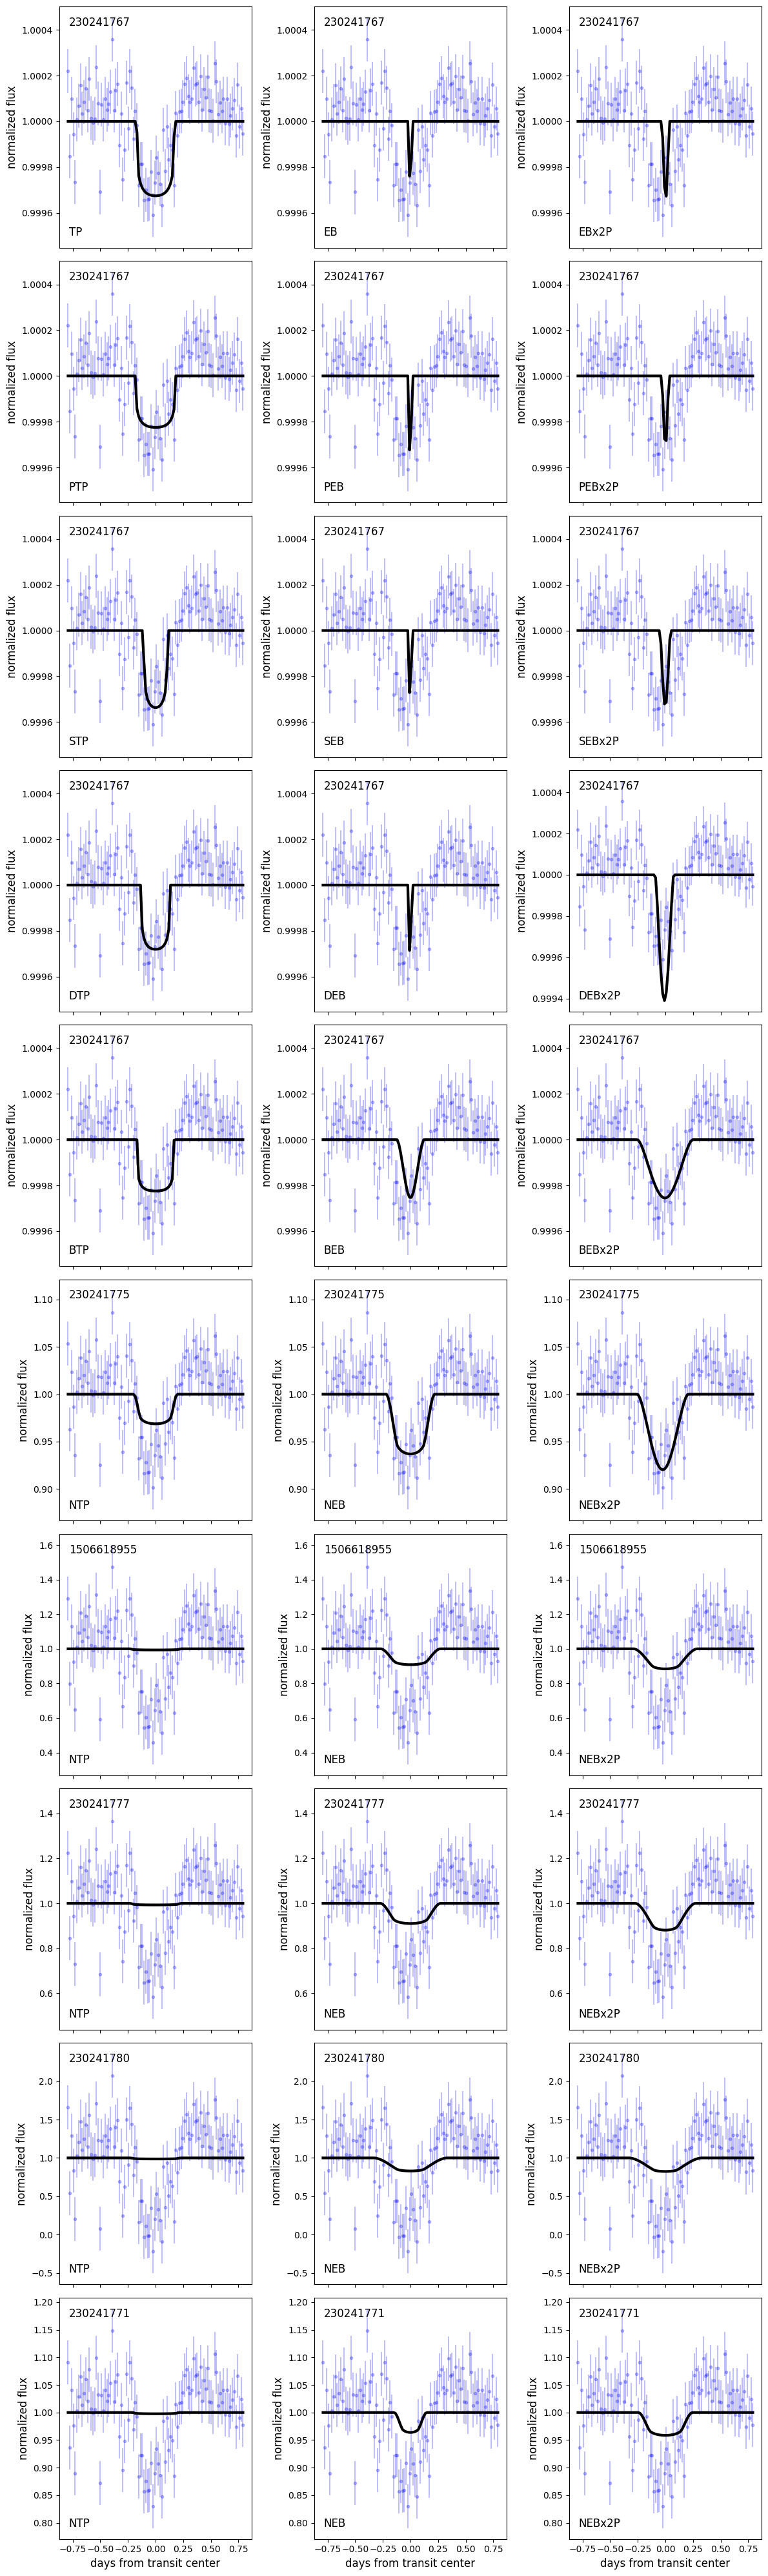

In [16]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [17]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.738739920206622 +/- 0.24050590789529383
NFPP = 0.3908411057337843 +/- 0.14223990927989907
CPU times: user 46min 7s, sys: 1min 10s, total: 47min 18s
Wall time: 36min 25s


Our final conclusion about this specified planet of TIC 230241767 is that it is a false positive (according to the range of FPP and NFPP set by TRICERATOPS).